- 일변량 분석(univariate analysis): 한번에 하나의 변수
- 이변량 분석(bivariate analysis): 두 변수
- 다변량 분석(multivariate analysis): 셋 이상의 변수

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 수치형 변수 vs 수치형 변수

In [2]:
kc_tax = pd.read_csv('../../data/kc_tax.csv')

In [3]:
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


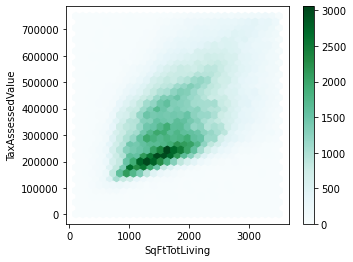

In [4]:
# 육각형 구간(hexagonal binning)

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :] # 데이터 필터링

ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                        gridsize=30, sharex=False, figsize=(5, 4))

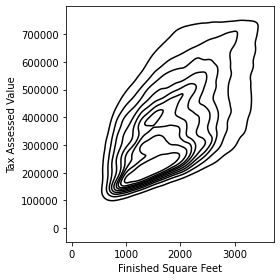

In [5]:
# 등고 도표(contour plot)
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', color='black')
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

## 범주형 변수 vs 범주형 변수

In [6]:
lc_loans = pd.read_csv('../../data/lc_loans.csv')

In [7]:
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [8]:
# 분할표(빈도)
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x:len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [9]:
# 분할표(백분율)
df = crosstab.copy().loc['A':'G', :]

df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / df['All'].sum()
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


## 범주형 변수 vs 수치형 변수

In [10]:
airline_stats = pd.read_csv('../../data/airline_stats.csv')

In [11]:
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


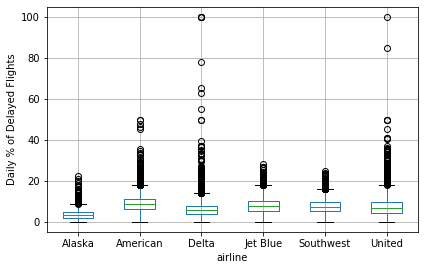

In [12]:
# 상자그림(box plot) - violim plot에 비해 이상값을 확인하기 쉬움
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
plt.suptitle('')
ax.set_title('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

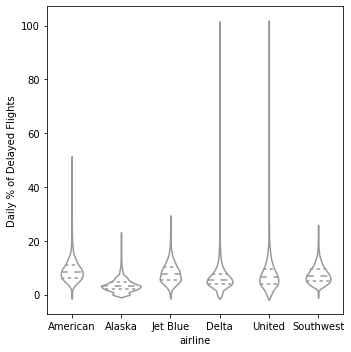

In [13]:
# 바이올린 도표(violin plot) - boxplot에 비해 분포를 확인하기 쉬움
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', inner='quartile', color='white')
ax.set_ylabel('Daily % of Delayed Flights')

fig.tight_layout()
plt.show()

## 다변수 시각화

In [14]:
kc_tax = pd.read_csv('../../data/kc_tax.csv')

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

In [15]:
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [16]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0['ZipCode'].isin(zip_codes), :]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


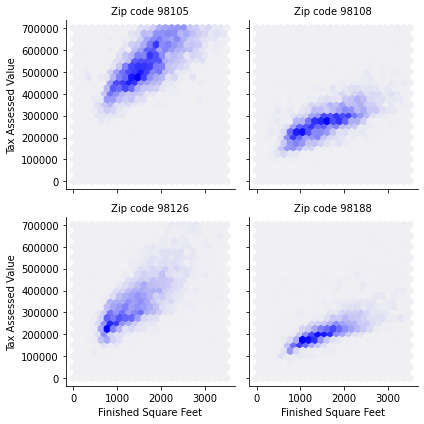

In [17]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', color='blue', 
     extent=[0, 3500, 0, 700000]) # x축과 y축의 한계 정의
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()